# Data Ingestion – Tabular Formats

In [1]:
from src.setup import *

In [2]:
%load_ext rpy2.ipython

In [3]:
%%capture --no-stdout err
%%R
library(tidyverse)

## Tidying Up

In [4]:
students = pd.read_csv('data/students-scores.csv')
students

,Last Name,First Name,4th Grade,5th Grade,6th Grade
0,Johnson,Mia,A,B+,A-
1,Lopez,Liam,B,B,A+
2,Lee,Isabella,C,C-,B-
3,Fisher,Mason,B,B-,C+
4,Gupta,Olivia,B,A+,A
5,Robinson,Sophia,A+,B-,A


In [5]:
# Generic conversion of letter grades to numbers
def num_score(x):
    to_num = {'A+': 4.3, 'A': 4, 'A-': 3.7,
              'B+': 3.3, 'B': 3, 'B-': 2.7,
              'C+': 2.3, 'C': 2, 'C-': 1.7}
    return x.map(lambda x: to_num.get(x, x))

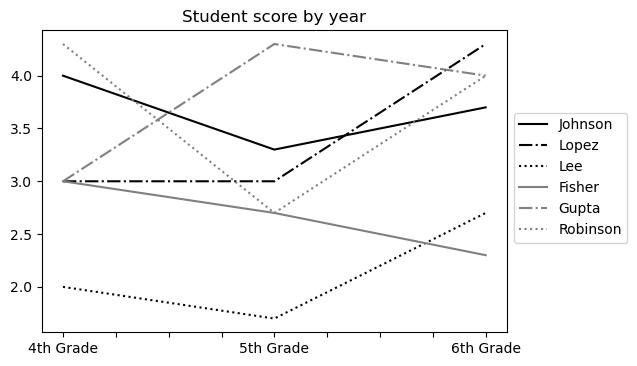

In [6]:
(students
     .set_index('Last Name')
     .drop('First Name', axis=1)
     .apply(num_score)
     .T
     .plot(title="Student score by year")
     .legend(bbox_to_anchor=(1, .75))
)
plt.savefig("img/(Ch01)Student score by year");

In [7]:
students.melt(
    id_vars=["Last Name", "First Name"], 
    var_name="Level",
    value_name="Score"
).set_index(['First Name', 'Last Name', 'Level'])

,,,Score
First Name,Last Name,Level,
Mia,Johnson,4th Grade,A
Liam,Lopez,4th Grade,B
Isabella,Lee,4th Grade,C
Mason,Fisher,4th Grade,B
...,...,...,...
Isabella,Lee,6th Grade,B-
Mason,Fisher,6th Grade,C+
Olivia,Gupta,6th Grade,A
Sophia,Robinson,6th Grade,A


In [8]:
%%capture --no-stdout err
%%R
library('tidyverse')

studentsR <- read_csv('data/students-scores.csv')
studentsR


── Column specification ──────────────────────────────────────────────────────────────────
cols(
  `Last Name` = col_character(),
  `First Name` = col_character(),
  `4th Grade` = col_character(),
  `5th Grade` = col_character(),
  `6th Grade` = col_character()
)

# A tibble: 6 x 5
  `Last Name` `First Name` `4th Grade` `5th Grade` `6th Grade`
  <chr>       <chr>        <chr>       <chr>       <chr>      
1 Johnson     Mia          A           B+          A-         
2 Lopez       Liam         B           B           A+         
3 Lee         Isabella     C           C-          B-         
4 Fisher      Mason        B           B-          C+         
5 Gupta       Olivia       B           A+          A          
6 Robinson    Sophia       A+          B-          A          


In [9]:
%%capture --no-stdout err
%%R
studentsR <- read_csv('data/students-scores.csv')
studentsR %>% 
  pivot_longer(c(`4th Grade`, `5th Grade`, `6th Grade`), 
               names_to = "Level", 
               values_to = "Score")


── Column specification ──────────────────────────────────────────────────────────────────
cols(
  `Last Name` = col_character(),
  `First Name` = col_character(),
  `4th Grade` = col_character(),
  `5th Grade` = col_character(),
  `6th Grade` = col_character()
)

# A tibble: 18 x 4
   `Last Name` `First Name` Level     Score
   <chr>       <chr>        <chr>     <chr>
 1 Johnson     Mia          4th Grade A    
 2 Johnson     Mia          5th Grade B+   
 3 Johnson     Mia          6th Grade A-   
 4 Lopez       Liam         4th Grade B    
 5 Lopez       Liam         5th Grade B    
 6 Lopez       Liam         6th Grade A+   
 7 Lee         Isabella     4th Grade C    
 8 Lee         Isabella     5th Grade C-   
 9 Lee         Isabella     6th Grade B-   
10 Fisher      Mason        4th Grade B    
11 Fisher      Mason        5th Grade B-   
12 Fisher      Mason        6th Grade C+   
13 Gupta       Olivia       4th Grade B    
14 Gupta       Olivia       5th Grade A+   
15 Gupta   

## CSV

### Sanity Checks

In [10]:
# Use try/except to avoid full traceback in example
try:
    pd.read_csv('data/big-random.csv')
except Exception as err:
    print_err(err)

ParserError
Error tokenizing data. C error: Expected 6 fields in line 75, saw 8


In [11]:
%%bash
# What is the general size/shape of this file?
wc data/big-random.csv

 100000  100000 4335846 data/big-random.csv


In [12]:
%%bash
cat data/big-random.csv | 
    tr -d -c ',\n' | 
    awk '{ print length; }' | 
    sort | 
    uniq -c

     46 3
  99909 5
     45 7


In [13]:
%%bash
grep -C1 -nP '^([^,]+,){7}' data/big-random.csv | head

74-squarcerai,45,quiescenze,12,scuoieremo,70
75:fantasmagorici,28,immischiavate,44,schiavizzammo,97,sfilzarono,49
76-interagiste,50,repentagli,72,attendato,95
--
712-resettando,58,strisciato,46,insaldai,62
713:aspirasse,15,imbozzimatrici,70,incanalante,93,succhieremo,41
714-saccarometriche,18,stremaste,12,hindi,19
--
8096-squincio,16,biascicona,93,solisti,70
8097:rinegoziante,50,circoncidiamo,83,stringavate,79,stipularono,34


In [14]:
import re
pat = re.compile(r'^([^,]+,){5}[^,]*$')
with open('data/big-random.csv') as fh:
    lines = [l.strip().split(',') 
             for l in fh if re.match(pat, l)]
pd.DataFrame(lines)

,0,1,2,3,4,5
0,infilaste,21,esemplava,15,stabaccavo,73
1,abbadaste,50,enartrosi,85,iella,54
2,frustulo,77,temporale,83,scoppianti,91
3,gavocciolo,84,postelegrafiche,93,inglesizzanti,63
...,...,...,...,...,...,...
99905,notareschi,60,paganico,64,esecutavamo,20
99906,rispranghiamo,11,schioccano,44,imbozzarono,80
99907,compone,85,disfronderebbe,19,vaporizzavo,54
99908,ritardata,29,scordare,43,appuntirebbe,24


### The Good, The Bad, and The Textual Data

**The Bad**

In [15]:
%%bash
cat data/parts.fwf

Part_No  Description              Maker               Price (USD)
12345    Wankle rotary engine     Acme Corporation    555.55
67890    Sousaphone               Marching Inc.       333.33
2468     Feather Duster           Sweeps Bros         22.22
A9922    Area 51 metal fragment   No Such Agency      9999.99

In [16]:
df = pd.read_fwf('data/parts.fwf', nrows=3)
df

,Part_No,Description,Maker,Price (USD)
0,12345,Wankle rotary engine,Acme Corporation,555.55
1,67890,Sousaphone,Marching Inc.,333.33
2,2468,Feather Duster,Sweeps Bros,22.22


In [17]:
df.dtypes

Part_No          int64
Description     object
Maker           object
Price (USD)    float64
dtype: object

In [18]:
df = pd.read_fwf('data/parts.fwf')
df

,Part_No,Description,Maker,Price (USD)
0,12345,Wankle rotary engine,Acme Corporation,555.55
1,67890,Sousaphone,Marching Inc.,333.33
2,2468,Feather Duster,Sweeps Bros,22.22
3,A9922,Area 51 metal fragment,No Such Agency,9999.99


In [19]:
df.dtypes  # type of `Part_No` changed

Part_No         object
Description     object
Maker           object
Price (USD)    float64
dtype: object

In [20]:
%%capture --no-stdout err
%%R
read_table('data/parts.fwf')


── Column specification ──────────────────────────────────────────────────────────────────
cols(
  Part_No = col_character(),
  Description = col_character(),
  Maker = col_character(),
  `Price (USD)` = col_double()
)

# A tibble: 4 x 4
  Part_No Description            Maker            `Price (USD)`
  <chr>   <chr>                  <chr>                    <dbl>
1 12345   Wankle rotary engine   Acme Corporation         556. 
2 67890   Sousaphone             Marching Inc.            333. 
3 2468    Feather Duster         Sweeps Bros               22.2
4 A9922   Area 51 metal fragment No Such Agency         10000. 


In [21]:
%%R
read_table('data/parts.fwf', 
           n_max = 3, 
           col_types = cols("i", "-", "f", "n"))

# A tibble: 3 x 3
  Part_No Maker            `Price (USD)`
    <int> <fct>                    <dbl>
1   12345 Acme Corporation         556. 
2   67890 Marching Inc.            333. 
3    2468 Sweeps Bros               22.2


In [22]:
%%bash
# Notice many date formats
cat data/parts.tsv

Part_No	Description	Date	Price (USD)
12345	Wankle rotary	2020-04-12T15:53:21	555.55
67890	Sousaphone	April 12, 2020	333.33
2468	Feather Duster	4/12/2020	22.22
A9922	Area 51 metal	04/12/20	9999.99


In [23]:
# Let Pandas make guesses for each row
# VERY SLOW for large tables
parts = pd.read_csv('data/parts.tsv', 
                    sep='\t', parse_dates=['Date'])
parts

,Part_No,Description,Date,Price (USD)
0,12345,Wankle rotary,2020-04-12 15:53:21,555.55
1,67890,Sousaphone,2020-04-12 00:00:00,333.33
2,2468,Feather Duster,2020-04-12 00:00:00,22.22
3,A9922,Area 51 metal,2020-04-12 00:00:00,9999.99


In [24]:
parts.dtypes

Part_No                object
Description            object
Date           datetime64[ns]
Price (USD)           float64
dtype: object

**The Good**

In [25]:
# Generated data files with random values
from glob import glob
# Use glob() function to identify files matching pattern
glob('data/multicsv/2000-*.csv')[:8] # ... and more

['data/multicsv/2000-01-27.csv',
 'data/multicsv/2000-01-26.csv',
 'data/multicsv/2000-01-06.csv',
 'data/multicsv/2000-01-20.csv',
 'data/multicsv/2000-01-13.csv',
 'data/multicsv/2000-01-22.csv',
 'data/multicsv/2000-01-21.csv',
 'data/multicsv/2000-01-24.csv']

In [26]:
import dask.dataframe as dd
df = dd.read_csv('data/multicsv/2000-*-*.csv', 
                 parse_dates=['timestamp'])
print("Total rows:", len(df))
df.head()

Total rows: 2592000


,timestamp,id,name,x,y
0,2000-01-01 00:00:00,979,Zelda,0.802163,0.166619
1,2000-01-01 00:00:01,1019,Ingrid,-0.349999,0.704687
2,2000-01-01 00:00:02,1007,Hannah,-0.169853,-0.050842
3,2000-01-01 00:00:03,1034,Ursula,0.868090,-0.190783
4,2000-01-01 00:00:04,1024,Ingrid,0.083798,0.109101


In [27]:
df.mean().compute()

id    999.965606
x       0.000096
y       0.000081
dtype: float64

## Spreadsheets Considered Harmful

In [28]:
# Default engine `xlrd` might have bug in Python 3.9
pd.read_excel('data/Excel-Pitfalls.xlsx',
              sheet_name="Dask Sample", engine="openpyxl")

,timestamp,id,name,x
0,2000-01-01 00:00:00,979,Zelda,0.802163
1,2000-01-01 0:00:01,1019.5,Ingrid,-0.349999
2,2000-01-01 00:00:02,1007,Hannah,-0.169853
3,2000-01-01 00:00:03,1034,Ursula,0.86809
4,timestamp,id,name,y
5,2000-01-01 00:00:02,1007,Hannah,-0.050842
6,2000-01-01 00:00:03,1034,Ursula,-0.190783
7,2000-01-01 00:00:04,1024,Ingrid,0.109101


In [29]:
df1 = pd.read_excel('data/Excel-Pitfalls.xlsx', 
                    nrows=5, dtype=object, engine="openpyxl")
df1.loc[:2]   # Just look at first few rows

,timestamp,id,name,x
0,2000-01-01 00:00:00,979,Zelda,0.802163
1,2000-01-01 00:00:01,1019.5,Ingrid,-0.349999
2,2000-01-01 00:00:02,1007,Hannah,-0.169853


In [30]:
pd.read_excel('data/Excel-Pitfalls.xlsx', skiprows=7, engine="openpyxl")

,timestamp,id,name,y
0,2000-01-01 00:00:02,1007,Hannah,-0.050842
1,2000-01-01 00:00:03,1034,Ursula,-0.190783
2,2000-01-01 00:00:04,1024,Ingrid,0.109101


In [31]:
df1.dtypes

timestamp    datetime64[ns]
id                   object
name                 object
x                    object
dtype: object

In [32]:
# Look at the stored data type of each cell
tss = df1.loc[:2, 'timestamp']
for i, ts in enumerate(tss):
    print(f"TS {i}: {ts}\t{ts.__class__.__name__}")

TS 0: 2000-01-01 00:00:00	Timestamp
TS 1: 2000-01-01 00:00:01	Timestamp
TS 2: 2000-01-01 00:00:02	Timestamp


In [33]:
pd.to_datetime(tss)

0   2000-01-01 00:00:00
1   2000-01-01 00:00:01
2   2000-01-01 00:00:02
Name: timestamp, dtype: datetime64[ns]

In [34]:
# Look at the stored data type of each cell
ids = df1.loc[:3, 'id']
for i, id_ in enumerate(ids):
    print(f"id {i}: {id_}\t{id_.__class__.__name__}")

id 0: 979	int
id 1: 1019.5	float
id 2: 1007	int
id 3: 1034	str


In [35]:
ids.astype(int)

0     979
1    1019
2    1007
3    1034
Name: id, dtype: int64

In [36]:
# Only rows through index `3` are useful
# We are casting to more specific data types 
#   based on domain and problem knowledge
df1 = df1.loc[0:3].astype(
    {'id': np.uint16, 
     'name': pd.StringDtype(), 
     'x': float})
# datetimes require conversion function, not just type
df1['timestamp'] = pd.to_datetime(df1.timestamp)
print(df1.dtypes)

timestamp    datetime64[ns]
id                   uint16
name                 string
x                   float64
dtype: object


In [37]:
df1.set_index('timestamp')

,id,name,x
timestamp,,,
2000-01-01 00:00:00,979,Zelda,0.802163
2000-01-01 00:00:01,1019,Ingrid,-0.349999
2000-01-01 00:00:02,1007,Hannah,-0.169853
2000-01-01 00:00:03,1034,Ursula,0.868090


## SQL RDBMS

### Massaging Data Types

In [38]:
# Function connect_local() spelled out in chapter 4 (Anomaly Detection)
con, engine = connect_local()
cur = con.cursor()
cur.execute("SELECT * FROM dask_sample")
pprint(cur.fetchmany(2))

[(3456,
  datetime.datetime(2000, 1, 2, 0, 57, 36),
  941,
  'Alice     ',
  Decimal('-0.612'),
  -0.636485),
 (3457,
  datetime.datetime(2000, 1, 2, 0, 57, 37),
  1004,
  'Victor    ',
  Decimal('0.450'),
  -0.68771815)]


In [39]:
df = pd.read_sql('dask_sample', engine, index_col='index')
df.tail(3)

,timestamp,id,name,x,y
index,,,,,
5676,2000-01-02 01:34:36,1041,Charlie,-0.587,0.206869
5677,2000-01-02 01:34:37,1017,Ray,0.311,0.256218
5678,2000-01-02 01:34:38,1036,Yvonne,0.409,0.535841


In [40]:
df.dtypes

timestamp    datetime64[ns]
id                    int64
name                 object
x                   float64
y                   float64
dtype: object

In [41]:
cur.execute("SELECT * FROM dask_sample")
cur.description

(Column(name='index', type_code=23),
 Column(name='timestamp', type_code=1114),
 Column(name='id', type_code=21),
 Column(name='name', type_code=1042),
 Column(name='x', type_code=1700),
 Column(name='y', type_code=700))

In [42]:
rows = cur.fetchall()
[type(v) for v in rows[0]]

[int, datetime.datetime, int, str, decimal.Decimal, float]

In [43]:
# Read the data with no imposed data types
df = pd.DataFrame(rows, 
                  columns=[col.name for col in cur.description],
                  dtype=object)

# Assign specific int or float lengths to some fields
types = {'index': np.int32, 'id': np.int16, 'y': np.float32}
df = df.astype(types)

# Cast the Python datetime to a Pandas datetime
df['timestamp'] = pd.to_datetime(df.timestamp)
df.set_index('index').head(3)

,timestamp,id,name,x,y
index,,,,,
3456,2000-01-02 00:57:36,941,Alice,-0.612,-0.636485
3457,2000-01-02 00:57:37,1004,Victor,0.450,-0.687718
3458,2000-01-02 00:57:38,980,Quinn,0.552,0.454158


In [44]:
df.dtypes

index                 int32
timestamp    datetime64[ns]
id                    int16
name                 object
x                    object
y                   float32
dtype: object

In [45]:
pprint({repr(x): x.__class__.__name__ 
        for x in df.reset_index().iloc[0]})

{"'Alice     '": 'str',
 '-0.636485': 'float32',
 '0': 'int64',
 '3456': 'int32',
 '941': 'int16',
 "Decimal('-0.612')": 'Decimal',
 "Timestamp('2000-01-02 00:57:36')": 'Timestamp'}


### Repeating in R

In [46]:
%%capture --no-stdout err
%%R
require("RPostgreSQL")
drv <- dbDriver("PostgreSQL")
con <- dbConnect(drv, dbname = "dirty",
                 host = "localhost", port = 5432,
                 user = "cleaning", password = "data")
sql <- "SELECT id, name, x, y FROM dask_sample LIMIT 3"
data <- tibble(dbGetQuery(con, sql))
data

# A tibble: 3 x 4
     id name              x      y
  <int> <chr>         <dbl>  <dbl>
1   941 "Alice     " -0.612 -0.636
2  1004 "Victor    "  0.45  -0.688
3   980 "Quinn     "  0.552  0.454


In [47]:
%%capture --no-stdout err
%%R
sql <- "SELECT max(x) AS max_x, max(y) AS max_y, 
               name, count(name) 
        FROM dask_sample 
        WHERE id > 1050 
        GROUP BY name 
        ORDER BY count(name) DESC
        LIMIT 12;"
# Here we simply retrieve a data.frame 
# rather than convert to tibble 
dbGetQuery(con, sql)

   max_x     max_y       name count
1  0.733 0.7685581 Hannah        10
2  0.469 0.8493844 Norbert       10
3  0.961 0.7355076 Wendy          9
4  0.950 0.6730366 Quinn          8
5  0.892 0.8534938 Michael        7
6  0.772 0.9892333 Yvonne         7
7  0.958 0.8597920 Patricia       6
8  0.953 0.8659175 Ingrid         6
9  0.998 0.9807807 Oliver         6
10 0.050 0.5018596 Laura          6
11 0.399 0.8085724 Alice          5
12 0.604 0.8264008 Kevin          5


### Where SQL Goes Wrong (And How to Notice It)

In [48]:
amtrak = pd.read_sql('bad_amtrak', engine)
amtrak.head()

,Code,StationName,City,State,Visitors
0,ABB,Abbotsford-Colby,Colby,WI,18631
1,ABE,Aberdeen,Aberdeen,MD,12286
2,ABN,Absecon,Absecon,NJ,5031
3,ABQ,Albuquerque,Albuquerque,NM,14285
4,ACA,Antioch-Pittsburg,Antioch,CA,16282


In [49]:
amtrak['StationName'] = amtrak.StationName.str.strip()
hist = amtrak.StationName.str.len().value_counts().sort_index()
hist

4      15
5      46
6     100
7     114
     ... 
17     15
18     17
19     27
20    116
Name: StationName, Length: 17, dtype: int64

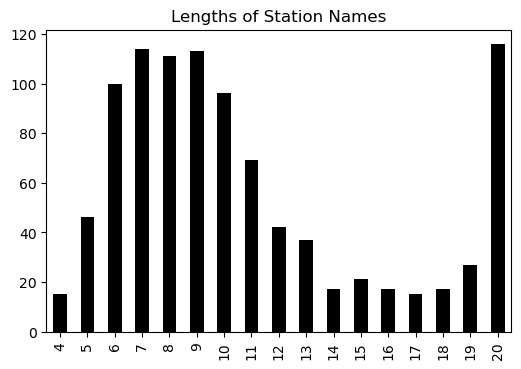

In [50]:
hist.plot(kind='bar', 
          title="Lengths of Station Names")
plt.savefig('img/(Ch01)Lengths of Station Names')

In [51]:
amtrak[amtrak.StationName.str.len() == 20]

,Code,StationName,City,State,Visitors
28,ARI,Astoria (Shell Stati,Astoria,OR,27872
31,ART,Astoria (Transit Cen,Astoria,OR,22116
42,BAL,Baltimore (Penn Stat,Baltimore,MD,19953
50,BCA,Baltimore (Camden St,Baltimore,MD,32767
...,...,...,...,...,...
965,YOC,Yosemite - Curry Vil,Yosemite National Park,CA,28352
966,YOF,Yosemite - Crane Fla,Yosemite National Park,CA,32767
969,YOV,Yosemite - Visitor C,Yosemite National Park,CA,29119
970,YOW,Yosemite - White Wol,Yosemite National Park,CA,16718


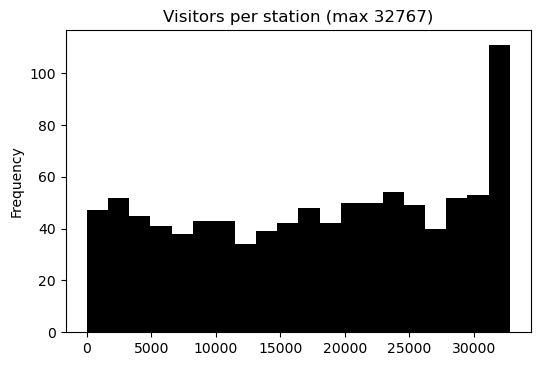

In [52]:
max_ = amtrak.Visitors.max()
amtrak.Visitors.plot(
        kind='hist', bins=20, 
        title=f"Visitors per station (max {max_})")
plt.savefig(f"img/(Ch01)Visitors per station (max {max_})")

In [53]:
ints = pd.Series(
    [100, 200, 15_000, 50_000, -15_000, -50_000])
ints.astype(np.int16)

0      100
1      200
2    15000
3   -15536
4   -15000
5    15536
dtype: int16

## Other Formats

### HDF5 and NetCDF-4

#### Tools and Libraries

In [54]:
import h5py
h5fname = ('data/earthdata/OMI-Aura_ANC-OMVFPITMET'
           '_2020m0216t225854-o82929_v003'
           '-2020m0217t090311.nc4')

data = h5py.File(h5fname, mode='r')

for name, arr in data.items():
    print(f"{name:6s} | {str(arr.shape):14s} | "
          f"{str(arr.dtype):7s} | {arr.attrs['units'][0]}")

DELP   | (1494, 60, 47) | float32 | Pa
PBLTOP | (1494, 60)     | float32 | Pa
PHIS   | (1494, 60)     | float32 | m+2 s-2
PS     | (1494, 60)     | float32 | Pa
T      | (1494, 60, 47) | float32 | K
TROPPB | (1494, 60)     | float32 | Pa
U      | (1494, 60, 47) | float32 | m s-1
U10M   | (1494, 60)     | float32 | m s-1
V      | (1494, 60, 47) | float32 | m s-1
V10M   | (1494, 60)     | float32 | m s-1
lat    | (1494, 60)     | float32 | degrees_north
lev    | (47,)          | int16   | 1
line   | (1494,)        | int16   | 1
lon    | (1494, 60)     | float32 | degrees_east
sample | (60,)          | int16   | 1
time   | (1494,)        | float64 | seconds since 1993-01-01 00:00:00


In [55]:
# A 3-D block from middle of DELP array
middle = data['V'][::500, 10:12, :3]
middle

array([[[17.032158  , 12.763597  ,  3.7710803 ],
        [16.53227   , 12.759642  ,  4.1722884 ]],

       [[ 4.003829  , -1.0843939 , -6.7918572 ],
        [ 3.818467  , -1.0030019 , -6.6708655 ]],

       [[-2.7798688 ,  0.24923703, 20.513933  ],
        [-2.690715  ,  0.2226392 , 20.473366  ]]], dtype=float32)

In [56]:
middle.mean(axis=1)

array([[16.782215  , 12.76162   ,  3.9716845 ],
       [ 3.911148  , -1.0436978 , -6.7313614 ],
       [-2.735292  ,  0.23593812, 20.493649  ]], dtype=float32)

In [57]:
%%R -i h5fname
library(rhdf5)
h5ls(h5fname)

   group   name       otype  dclass            dim
0      /   DELP H5I_DATASET   FLOAT 47 x 60 x 1494
1      / PBLTOP H5I_DATASET   FLOAT      60 x 1494
2      /   PHIS H5I_DATASET   FLOAT      60 x 1494
3      /     PS H5I_DATASET   FLOAT      60 x 1494
4      /      T H5I_DATASET   FLOAT 47 x 60 x 1494
5      / TROPPB H5I_DATASET   FLOAT      60 x 1494
6      /      U H5I_DATASET   FLOAT 47 x 60 x 1494
7      /   U10M H5I_DATASET   FLOAT      60 x 1494
8      /      V H5I_DATASET   FLOAT 47 x 60 x 1494
9      /   V10M H5I_DATASET   FLOAT      60 x 1494
10     /    lat H5I_DATASET   FLOAT      60 x 1494
11     /    lev H5I_DATASET INTEGER             47
12     /   line H5I_DATASET INTEGER           1494
13     /    lon H5I_DATASET   FLOAT      60 x 1494
14     / sample H5I_DATASET INTEGER             60
15     /   time H5I_DATASET   FLOAT           1494


In [58]:
%%R -i h5fname
V = h5read(h5fname, 'V')
V[1:2, 10:12, 10:11]

, , 1

         [,1]     [,2]     [,3]
[1,] 17.69524 17.23481 16.57238
[2,] 12.46370 12.44905 12.47155

, , 2

         [,1]     [,2]     [,3]
[1,] 17.71876 17.25898 16.56942
[2,] 12.42049 12.40599 12.43139



In [59]:
make_h5_hierarchy()  # initialize the HDF5 file
f = h5py.File('data/hierarchy.h5', 'r+')
dset = f['/deeply/nested/group/my_data']
print(dset.shape, dset.dtype)

(10, 10, 10, 10) int32


In [60]:
for key, val in dset.attrs.items():
    print(key, "→", val)
print()
print("Data block:\n", dset[5, 3, 2:4, 8:])

author → David Mertz
citation → Cleaning Data Book
shape_type → 4-D integer array

Data block:
 [[-93 -53]
 [ 18 -37]]


In [61]:
dset[5, 3, 2:4, 8:] = np.random.randint(-99, 99, (2, 2))
print(dset[5, 3, 2:4, 8:])
f.close()                   # write change to disk

[[-45 -76]
 [-96 -21]]


In [62]:
%%R 
library(rhdf5)
h5ls('data/hierarchy.h5')

                   group      name       otype  dclass               dim
0                      /    deeply   H5I_GROUP                          
1                /deeply    nested   H5I_GROUP                          
2         /deeply/nested     group   H5I_GROUP                          
3   /deeply/nested/group   my_data H5I_DATASET INTEGER 10 x 10 x 10 x 10
4                /deeply      path   H5I_GROUP                          
5           /deeply/path elsewhere   H5I_GROUP                          
6 /deeply/path/elsewhere     other H5I_DATASET INTEGER                20
7           /deeply/path that_data H5I_DATASET   FLOAT             5 x 5


### SQLite

In [63]:
import sqlite3
db = sqlite3.connect('data/affinity.sqlite')
cur = db.cursor()
cur.execute("SELECT a, b, c FROM t1")
for row in cur:
    print([f"{x.__class__.__name__} {x}" for x in row])

['int 123', 'str 456', 'float 789.0']
['str xyz', 'str 3.14', 'float 2.71']


### Apache Parquet

In [64]:
%%bash
ls -x data/multicsv.parq

_common_metadata  _metadata	   part.0.parquet   part.1.parquet
part.10.parquet   part.11.parquet  part.12.parquet  part.13.parquet
part.14.parquet   part.15.parquet  part.16.parquet  part.17.parquet
part.18.parquet   part.19.parquet  part.2.parquet   part.20.parquet
part.21.parquet   part.22.parquet  part.23.parquet  part.24.parquet
part.25.parquet   part.26.parquet  part.27.parquet  part.28.parquet
part.29.parquet   part.3.parquet   part.4.parquet   part.5.parquet
part.6.parquet	  part.7.parquet   part.8.parquet   part.9.parquet


In [65]:
pd.read_parquet('data/multicsv.parq/')

,timestamp,id,name,x,y
index,,,,,
0,2000-01-01 00:00:00,979,Zelda,0.802163,0.166619
1,2000-01-01 00:00:01,1019,Ingrid,-0.349999,0.704687
2,2000-01-01 00:00:02,1007,Hannah,-0.169853,-0.050842
3,2000-01-01 00:00:03,1034,Ursula,0.868090,-0.190783
...,...,...,...,...,...
86396,2000-01-10 23:59:56,998,Jerry,0.589575,0.412477
86397,2000-01-10 23:59:57,1011,Yvonne,0.047785,-0.202337
86398,2000-01-10 23:59:58,1053,Oliver,0.690303,-0.639954
86399,2000-01-10 23:59:59,1009,Ursula,0.228775,0.750066


## Data Frames

### Spark/Scala

### Pandas and Derived Wrappers

In [66]:
import dask.dataframe as dd
dfd = dd.read_csv('data/multicsv/*.csv', parse_dates=['timestamp'])

In [67]:
(dfd
   .loc[dfd.x > dfd.y+1,            # Row predicate
        ['name', 'x']]              # Column list
   .groupby("name")                 # Grouping column(s)
   .mean()                          # Aggregation
   .rename(columns={'x': 'Mean_x'}) # Naming
   .nsmallest(5, 'Mean_x')          # Selection by order
).compute()                         # Concretize

,Mean_x
name,
Ray,0.662570
Ursula,0.662811
Xavier,0.664117
Wendy,0.664238
Kevin,0.664836


### Vaex

In [68]:
import vaex
dfv = vaex.read_csv_and_convert('data/multicsv/*.csv', copy_index=False)

In [69]:
print(
dfv
   [dfv.x > dfv.y + 1]  # Predicate selection of rows
   [['name', 'x']]      # List selection of columns
   .groupby('name')     # Grouping
   .agg({'x': 'mean'})  # Aggregation
   .sort('x')           # Sort (Vaex does not have .nsmallest() method)
   .head(5)             # First 5
)

  #  name           x
  0  Ray     0.66257
  1  Ursula  0.662811
  2  Xavier  0.664117
  3  Wendy   0.664238
  4  Kevin   0.664836


In [70]:
%%bash
rm -f data/multicsv/*.hdf5

### Data Frames in R (Tidyverse)

In [71]:
%%R 
files <- dir(path = "data/multicsv/", pattern = "*.csv", full.names = TRUE)
read_csv_quiet <- function(file) { 
    read_csv(file, col_types = cols("T", "n", "f", "n", "n"), progress = FALSE) }

data <- files   %>%
  # read_csv() on each file, reduce to one DF with rbind
  map(read_csv_quiet) %>%  
  # If this were genuinely large data, we would process each file individually
  reduce(rbind)  

data

# A tibble: 2,592,000 x 5
   timestamp              id name         x       y
   <dttm>              <dbl> <fct>    <dbl>   <dbl>
 1 2000-01-01 00:00:00   979 Zelda   0.802   0.167 
 2 2000-01-01 00:00:01  1019 Ingrid -0.350   0.705 
 3 2000-01-01 00:00:02  1007 Hannah -0.170  -0.0508
 4 2000-01-01 00:00:03  1034 Ursula  0.868  -0.191 
 5 2000-01-01 00:00:04  1024 Ingrid  0.0838  0.109 
 6 2000-01-01 00:00:05   955 Ingrid -0.757   0.308 
 7 2000-01-01 00:00:06   968 Laura   0.230  -0.913 
 8 2000-01-01 00:00:07   945 Ursula  0.265  -0.271 
 9 2000-01-01 00:00:08  1020 Victor  0.512  -0.481 
10 2000-01-01 00:00:09   992 Wendy   0.862  -0.599 
# … with 2,591,990 more rows


In [72]:
%%R 
info <- capture.output( 
# --- hide nonsense on STDERR
summary <- data   %>% 
  filter(x > y+1) %>%   # Predicate selection of rows
  select(name, x) %>%   # Selection of columns
  group_by(name)  %>%   # Grouping
                        # Aggregation and naming
  summarize(Mean_x = mean(x)) %>% 
  arrange(Mean_x) %>%   # Sort data
  head(5)               # First 5
# --- end of block for capture.output
,type = "message")   

summary

`summarise()` ungrouping output (override with `.groups` argument)
# A tibble: 5 x 2
  name   Mean_x
  <fct>   <dbl>
1 Ray     0.663
2 Ursula  0.663
3 Xavier  0.664
4 Wendy   0.664
5 Kevin   0.665


### Data Frames in R (data.table)

In [73]:
%%R
info <- capture.output( 
# --- hide nonsense on STDERR
library(data.table)
# --- end of block for capture.output
,type = "message")   

dt <- data.table(data)
summary <- dt[
    i = x > y + 1,      # Predicate selection of rows
                        # Aggregation and naming
    j = .(Mean_x = mean(x)), 
    by = .(name)]       # Grouping

# Sort data and first 5
summary[order(Mean_x), .SD[1:5]]

     name    Mean_x
1:    Ray 0.6625697
2: Ursula 0.6628107
3: Xavier 0.6641165
4:  Wendy 0.6642382
5:  Kevin 0.6648363


### Bash for Fun

In [74]:
%%bash
COND='{if ($4 > $5+1) print}'
SHOW='{for(j in count) print j,sum[j]/count[j]}'
AGG='{ count[$1]++; sum[$1]+=$2 }'" END $SHOW"

cat data/multicsv/*.csv | # Create the "data frame"
  grep -v ^timestamp    | # Remove the headers
  awk -F, "$COND"       | # Predicate selection
  cut -d, -f3,4         | # Select columns
  awk -F, "$AGG"        | # Aggregate by group
  sort -k2              | # Sort data
  head -5                 # First 5

Ray 0.66257
Ursula 0.662811
Xavier 0.664117
Wendy 0.664238
Kevin 0.664836
